# このテキストについて

テキストの目的
- 教師あり学習（回帰問題）の概観を知る
- scikit-laernを使い回帰を行えるようにする
- 手法の簡単な比較をする

どのように学ぶか  
定番のデータセットを通じて、回帰問題を解く流れやライブラリの使い方を学びます。

Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。


79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
# 警告非表示
import warnings
warnings.filterwarnings('ignore')

# 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [3]:
train = pd.read_csv('train.csv')
train = train[['GrLivArea', 'YearBuilt', 'SalePrice']]

# 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。


評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。


可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

### 欠損値の確認

In [4]:
train.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

### 基本統計量の確認

In [5]:
train.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


### 相関係数の確認

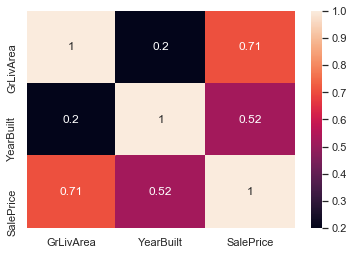

In [6]:
sns.heatmap(train.corr(), annot=True);

### 箱ひげ図でデータの散らばり具合を確認

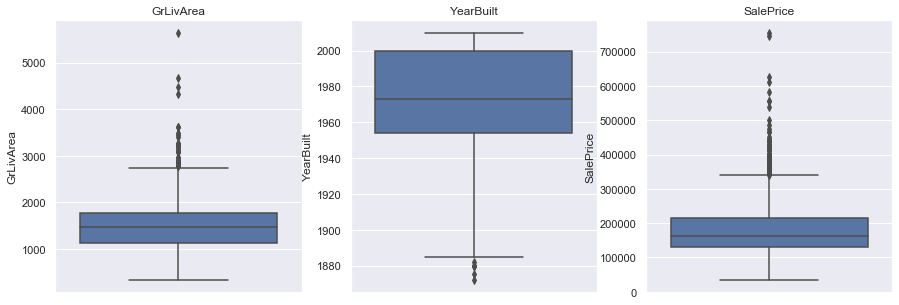

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('GrLivArea')
sns.boxplot(y=train['GrLivArea'])
plt.subplot(132)
plt.title('YearBuilt')
sns.boxplot(y=train['YearBuilt'])
plt.subplot(133)
plt.title('SalePrice')
sns.boxplot(y=train['SalePrice']);

### 考察
- 欠損値なし。
- 全て数値データで、ややばらつきがある。
- 居室面積と住宅価格に強い相関があり、築年日と住居価格にやや相関がある。特徴量間の相関はない。

### 前処理

In [8]:
# 訓練データ、検証データに分割
from sklearn.model_selection import train_test_split

# 特徴量X
X = train.iloc[:, :-1]

# 目的変数y
y = train['SalePrice'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
# 標準化を施す
from sklearn.preprocessing import StandardScaler

# 特徴量を標準化
scaler_x = StandardScaler()
scaler_x.fit(X_train)
X_train_std = scaler_x.transform(X_train)
X_test_std = scaler_x.transform(X_test)

# 目的変数を標準化
scaler_y = StandardScaler()
scaler_y.fit(y_train)
y_train_std = scaler_y.transform(y_train)
y_test_std = scaler_y.transform(y_test)

### 学習・推定・評価・可視化

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 学習
reg = LinearRegression()
reg.fit(X_train_std, y_train_std)

# 推定
reg_pred = reg.predict(X_test_std)

# 評価
print(f'MSE train: {mean_squared_error(y_train_std, reg.predict(X_train_std))}')
print(f'MSE test: {mean_squared_error(y_test_std, reg_pred)}')

MSE train: 0.3230340002216025
MSE test: 0.4390768488944986


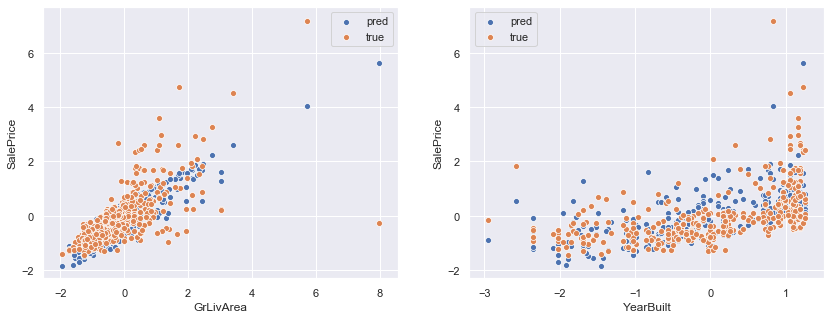

In [11]:
# 可視化
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
sns.scatterplot(X_test_std[:, :1][:, 0], reg_pred[:, 0], label='pred')
sns.scatterplot(X_test_std[:, :1][:, 0], y_test_std[:, 0], label='true')

plt.subplot(122)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
sns.scatterplot(X_test_std[:, 1:][:, 0], reg_pred[:, 0], label='pred')
sns.scatterplot(X_test_std[:, 1:][:, 0], y_test_std[:, 0], label='true');

# 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。


- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

In [12]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [13]:
# 指標値辞書
pred_dict = {}

In [14]:
# 学習・推定・評価・可視化の関数
def models(model, model_name, X_train=X_train_std, X_test=X_test_std, y_train=y_train_std, y_test=y_test_std):
    pred_list = []

    # 学習
    reg = model()
    reg.fit(X_train, y_train)

    # 推定
    train_pred = reg.predict(X_train)
    test_pred = reg.predict(X_test)

    # 評価
    pred_list.append(round(mean_squared_error(y_train, train_pred), 3))
    pred_list.append(round(mean_squared_error(y_test, test_pred), 3))
    
    # 辞書に追加
    pred_dict[model_name] = pred_list
    
    # 可視化
    plt.figure(figsize=(14, 5))
    if model_name == 'LinearRegression':
        plt.subplot(121)
        plt.title(model_name)
        plt.xlabel('GrLivArea')
        plt.ylabel('SalePrice')
        sns.scatterplot(X_test[:, :1][:, 0], test_pred[:, 0], label='pred')
        sns.scatterplot(X_test[:, :1][:, 0], y_test[:, 0], label='true')
        plt.subplot(122)
        plt.title(model_name)
        plt.xlabel('YearBuilt')
        plt.ylabel('SalePrice')
        sns.scatterplot(X_test[:, 1:][:, 0], test_pred[:, 0], label='pred')
        sns.scatterplot(X_test[:, 1:][:, 0], y_test[:, 0], label='true');
    else:
        plt.subplot(121)
        plt.title(model_name)
        plt.xlabel('GrLivArea')
        plt.ylabel('SalePrice')
        sns.scatterplot(X_test[:, :1][:, 0], test_pred, label='pred')
        sns.scatterplot(X_test[:, :1][:, 0], y_test[:, 0], label='true')
        plt.subplot(122)
        plt.title(model_name)
        plt.xlabel('YearBuilt')
        plt.ylabel('SalePrice')
        sns.scatterplot(X_test[:, 1:][:, 0], test_pred, label='pred')
        sns.scatterplot(X_test[:, 1:][:, 0], y_test[:, 0], label='true');

### テストデータの推定結果を可視化

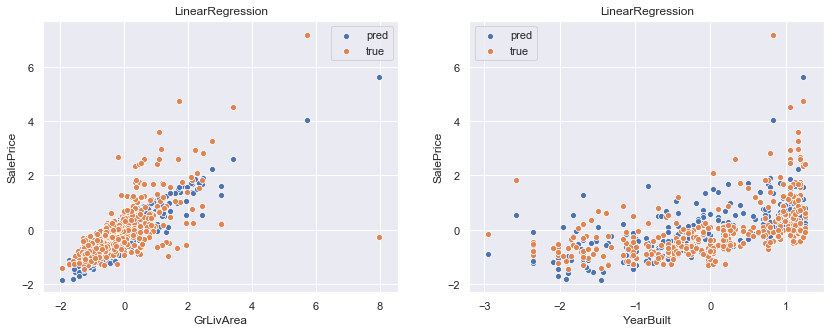

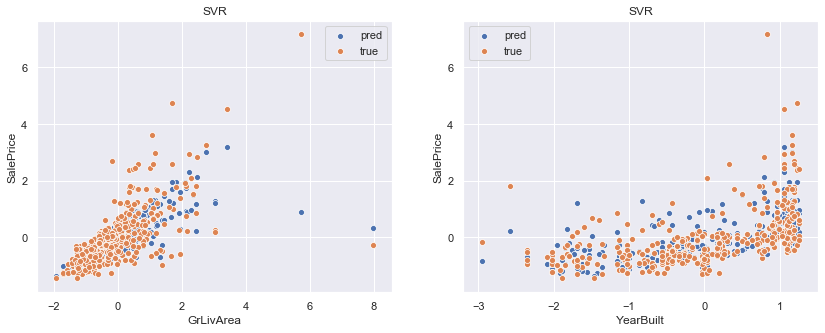

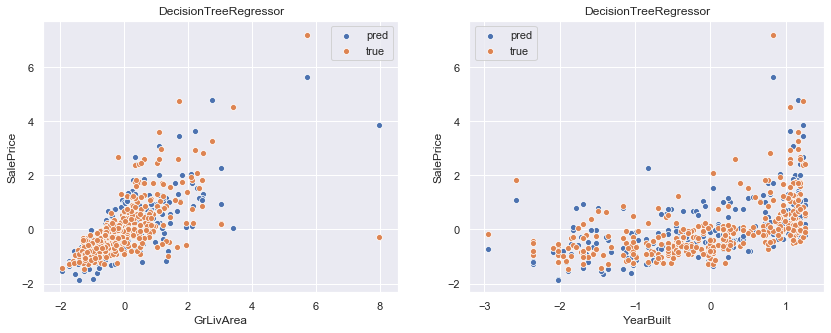

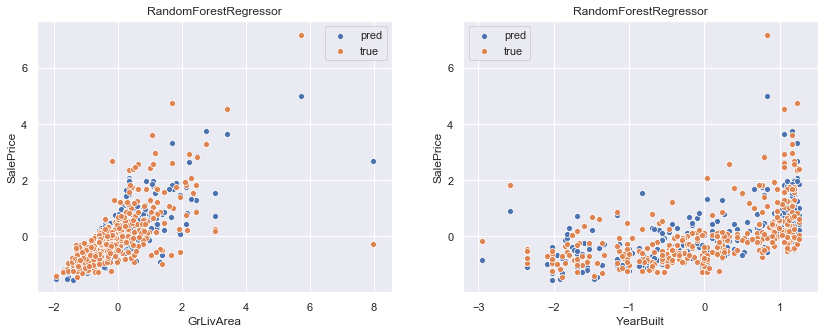

In [15]:
models(LinearRegression, 'LinearRegression')
models(SVR, 'SVR')
models(DecisionTreeRegressor, 'DecisionTreeRegressor')
models(RandomForestRegressor, 'RandomForestRegressor')

In [16]:
pd.DataFrame(pred_dict, index=['MSE_train', 'MSE_test'])

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE_train,0.323,0.277,0.003,0.045
MSE_test,0.439,0.369,0.495,0.285


### 考察
最も精度がよかった手法は、ランダムフォレストであった。しかし、訓練データの指標値から過学習に陥っていると考えられる。同様に決定木でも過学習が見られた。線形回帰とSVMは過学習は抑えられたもののランダムフォレストの精度に劣った。よって、回帰分析においては、ハイパーパラメータなどの調整を考慮した上で、ランダムフォレストが最も高い精度を発揮すると考えられる。

# 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

### 方針
- データの大枠はWeek3で掴めているため、分析は簡単に行う。  
- 数値データに絞る。　   
- パラメータはデフォルトのものを使用する。

### ① 特徴量を選択する。

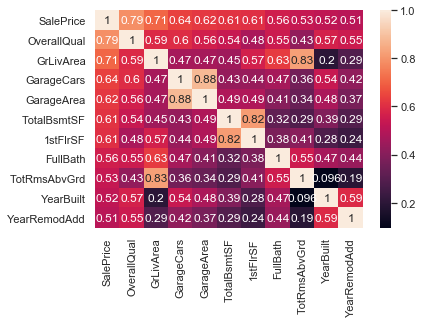

In [17]:
# 相関係数を確認する。
train_data = pd.read_csv('train.csv')
cols = train_data.corr().abs()['SalePrice'].nlargest(11).index
sns.heatmap(train_data[cols].corr(), annot=True);

In [18]:
# 多重共線性の恐れがある特徴量を削除
cols = cols.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'])
train_data = train_data[cols]
train_data.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd
0,208500,7,1710,2,856,2,2003,2003
1,181500,6,1262,2,1262,2,1976,1976
2,223500,7,1786,2,920,2,2001,2002
3,140000,7,1717,3,756,1,1915,1970
4,250000,8,2198,3,1145,2,2000,2000


### ② 訓練データ、検証データに分割

In [19]:
X = train_data.iloc[:, 1:]
y = train_data['SalePrice'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### ③ 標準化を施す

In [20]:
from sklearn.preprocessing import StandardScaler

# 特徴量を標準化
scaler_x = StandardScaler()
scaler_x.fit(X_train)
X_train_std = scaler_x.transform(X_train)
X_test_std = scaler_x.transform(X_test)

# 目的変数を標準化
scaler_y = StandardScaler()
scaler_y.fit(y_train)
y_train_std = scaler_y.transform(y_train)
y_test_std = scaler_y.transform(y_test)

### ④ 学習・推定・評価・可視化

In [21]:
# 学習・推定・評価の関数
pred_dict = {}
def models2(model, model_name, X_train=X_train_std, X_test=X_test_std, y_train=y_train_std, y_test=y_test_std):
    pred_list = []

    # 学習
    reg = model()
    reg.fit(X_train, y_train)

    # 推定
    train_pred = reg.predict(X_train)
    test_pred = reg.predict(X_test)

    # 評価
    pred_list.append(round(mean_squared_error(y_train, train_pred), 4))
    pred_list.append(round(mean_squared_error(y_test, test_pred), 4))
    
    # 辞書に追加
    pred_dict[model_name] = pred_list
    
    return test_pred

In [22]:
# 可視化関数
def graphs(pred):
    plt.figure(figsize=(15,10))
    for i, col in enumerate(X.columns):
        plt.subplot(2,4,i+1)
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        if np.allclose(pred, lr_pred):
            sns.scatterplot(X_test_std[:, i:][:, 0], pred[:, 0], label='pred')
        
        else:
            sns.scatterplot(X_test_std[:, i:][:, 0], pred, label='pred')
        sns.scatterplot(X_test_std[:, i:][:, 0], y_test_std[:, 0], label='true')

In [23]:
# 関数を呼び出す
lr_pred = models2(LinearRegression, 'LinearRegression')
svm_pred = models2(SVR, 'SVR')
dt_pred = models2(DecisionTreeRegressor, 'DecisionTreeRegressor')
rf_pred = models2(RandomForestRegressor, 'RandomForestRegressor')

### 線形回帰

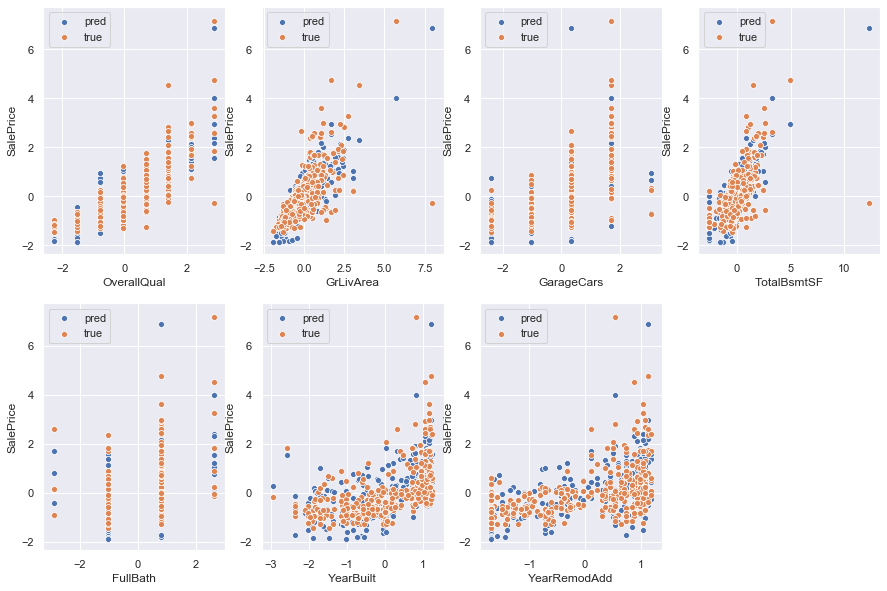

In [24]:
graphs(lr_pred)

### SVM

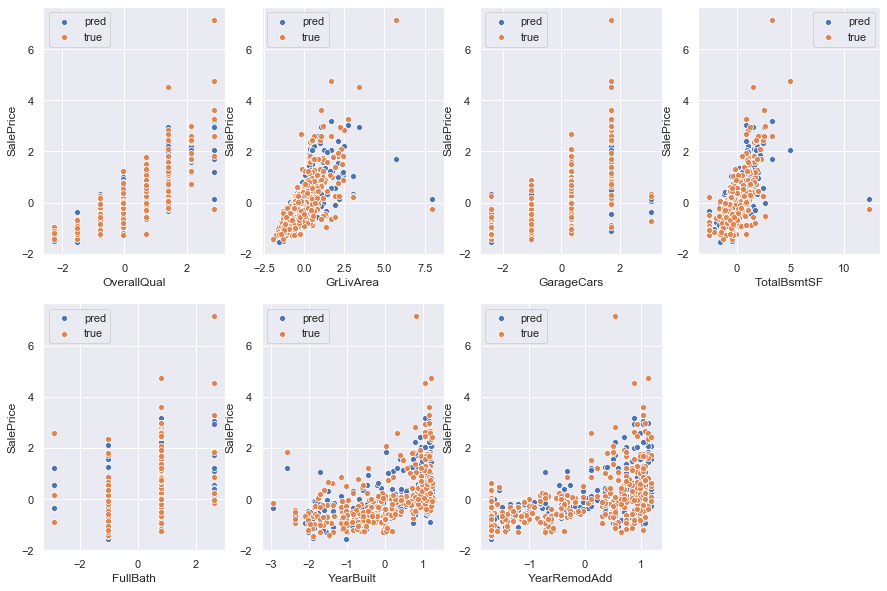

In [25]:
graphs(svm_pred)

### 決定木

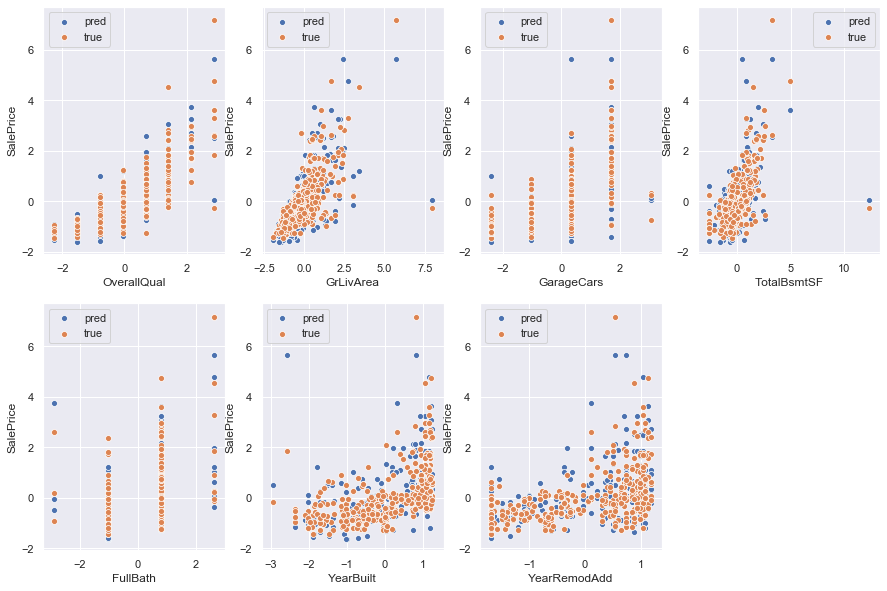

In [26]:
graphs(dt_pred)

### ランダムフォレスト

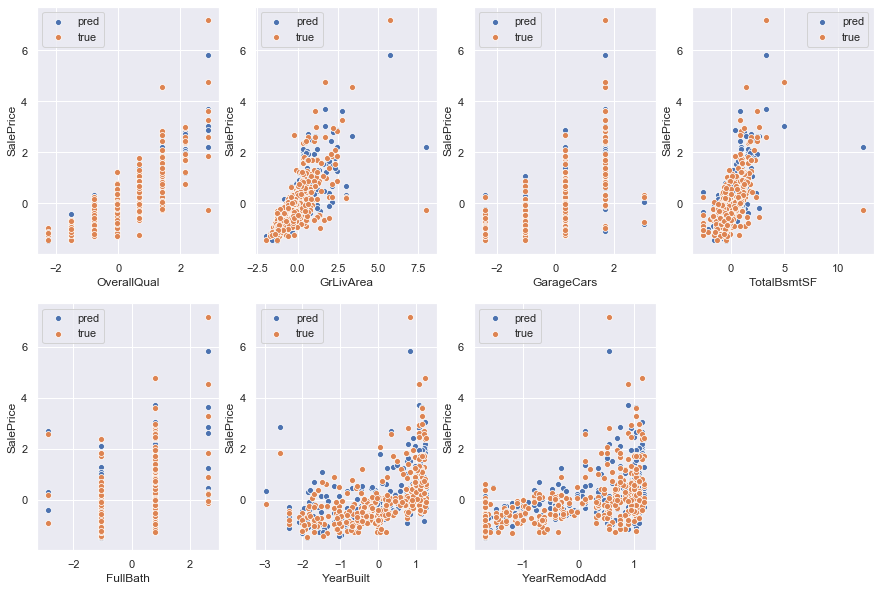

In [27]:
graphs(rf_pred)

In [28]:
pd.DataFrame(pred_dict, index=['MSE_train', 'MSE_test'])

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE_train,0.2028,0.1308,0.0002,0.0232
MSE_test,0.3349,0.2097,0.2933,0.1436


### ⑤ 考察
特徴量を増やしたことで全体的に精度が向上した。特徴量が２つの時と同様に最も高い精度を出したのはランダムフォレストであった。

# 私的好奇心、kaggleに提出する。

### ランダムフォレスト

In [29]:
# testデータ読み込み
test = pd.read_csv('test.csv')

# 前処理
X_test = test[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
               'FullBath', 'YearBuilt', 'YearRemodAdd']].fillna(test.mean())

# 学習
reg = RandomForestRegressor(random_state=0)
reg.fit(X, y)

# 推定
pred = reg.predict(X_test)

# 提出用ファイルの作成
submission =pd.DataFrame({'Id': test['Id'], 'SalePrice': pred})
submission.to_csv('submission_first.csv', index=False)

In [30]:
submission.head()

,Id,SalePrice
0,1461,116894.000000
1,1462,141153.500000
2,1463,164528.703333
3,1464,181494.000000
4,1465,209903.120000


score: 0.16308  
Top: 68%

### 勾配ブースティング

In [31]:
import xgboost as xgb

# testデータ読み込み
test = pd.read_csv('test.csv')

# 前処理
X_test = test[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
               'FullBath', 'YearBuilt', 'YearRemodAdd']].fillna(test.mean())

# 学習
reg = xgb.XGBRegressor(random_state=0)
reg.fit(X, y)

# 推定
pred = reg.predict(X_test)

# 提出用ファイルの作成
submission2 =pd.DataFrame({'Id': test['Id'], 'SalePrice': pred})
submission2.to_csv('submission_second.csv', index=False)

[19:10:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
submission2.head()

,Id,SalePrice
0,1461,120620.992188
1,1462,143895.421875
2,1463,162782.000000
3,1464,176625.000000
4,1465,210771.515625


score: 0.15617  
Top: 62%